In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

: 

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

: 

In [21]:
file_name = '../lspu_25_gr_batch_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
#Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
#C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)
print("average cost new", average_new)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.74046052 3.51405085 3.42862927 3.39667979 3.35759114 3.34246078
 3.34328065 3.32450379 3.30075713 3.28766352 3.27960868 3.25483721
 3.25339483]
average cost new [3.74046052 3.51405085 3.42862927 3.39667979 3.35759114 3.34246078
 3.34328065 3.32450379 3.30075713 3.28766352 3.27960868 3.25483721
 3.25339483]


In [15]:
average_queue_B

array([ 2.5    ,  4.5    ,  6.49984,  7.99975,  9.4996 , 10.5    ,
       10.99981, 12.49936, 15.499  , 20.5    , 25.5    , 37.99375,
       45.496  ])

In [4]:
file_name = '../lspu_25_gr_mwm_scaled.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, dummy, dummy, dummy, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M_sc = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M_sc = np.average(Q_paths_M,axis = 0)
print("average cost B", average_cost_B)
print("average cost M", average_cost_M_sc)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost B [3.74046052 3.51405085 3.42862927 3.39667979 3.35759114 3.34246078
 3.34328065 3.32450379 3.30075713 3.28766352 3.27960868 3.25483721
 3.25339483]
average cost M [4.39096514 3.40043199 3.34147486 3.30648575 3.297759   3.29579503
 3.29411162 3.28478793 3.27180523 3.26732104 3.269119   3.24033086
 3.22763015 3.19774973]


In [5]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar = fluid_sol['Cost']
print(Cstar)

Expected cost for c = 0 case: 4.311
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

[-1.02433084  2.55877145] [0.12844861]
[-0.84588093  0.46085391] [0.07626542]


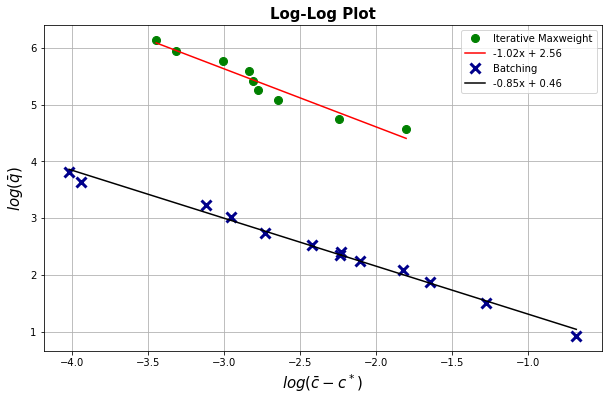

In [21]:
# Polynomial fit
deg = 1
xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B-Cstar)
yB2 = np.log(average_queue_B)




p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Iterative Maxweight",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

In [22]:
C_paths_B.shape

(100000, 13)

In [52]:
np.var(C_paths_B[C_paths_B[:,-1] > 0,-1])

279.5402156712974

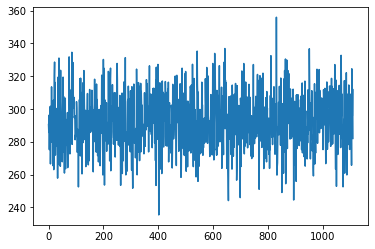

In [53]:
plt.plot(C_paths_B[C_paths_B[:,-1] > 0,-1])

In [60]:
idx = -2
var = np.var(C_paths_B[C_paths_B[:,idx] > 0,idx])
mu = np.mean(C_paths_B[C_paths_B[:,idx] > 0,idx])
print(var, mu, var/(mu**2))

209.00044742093016 244.11279086151194 0.0035072453173666876


In [61]:
file_name = "../longest_spatial_uniform_25_all_good.pkl"
with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M_og = M_res["Q_paths"]
C_paths_M_og = M_res["C_paths"]
Q_paths_B_og = B_res["Q_paths"]
C_paths_B_og = B_res["C_paths"]
#(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)

In [62]:
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_og = fluid_sol['Cost']
print(Cstar_og)

Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

In [63]:
C_paths_B_og = np.transpose( np.asarray( C_paths_B_og ) )

In [64]:
C_paths_B_og.shape

(100000, 38)

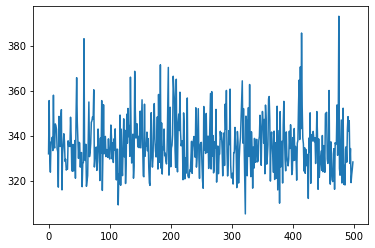

In [67]:
idx = -20
plt.plot(C_paths_B_og[C_paths_B_og[:,idx] > 0,idx])

In [69]:
locs = C_paths_B_og[:,idx] > 0
var = np.var(C_paths_B_og[locs,idx])
mu = np.mean(C_paths_B_og[locs,idx])
print(var, mu, var/(mu**2))

145.05939504426988 335.810135157606 0.001286347369895206


1.0
2.0
3.0
4.0
5.0
8.0
10.0
12.0
15.0
18.0
20.0
30.0
40.0
50.0
60.0
100.0
135.0
150.0
200.0
250.0
300.0
325.0
350.0
400.0
450.0
475.0
500.0
550.0
600.0
650.0
700.0
1200.0
1400.0
1600.0
1800.0
2000.0
2200.0
2400.0


Text(0.5, 1.0, 'Variances')

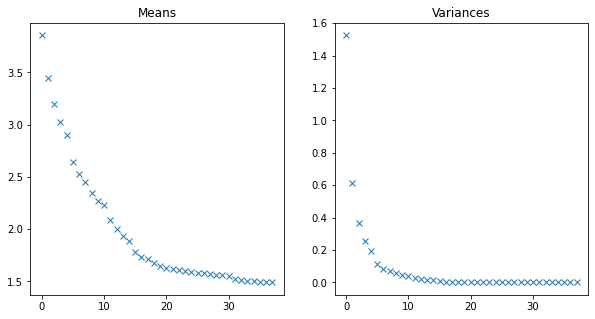

In [92]:
counts = C_paths_B_og.shape[1]
vals_og = []
vars_og = []
for i in range(counts):
    queue_size = max(Q_paths_B_og[:][i])
    print(queue_size)
        
    vals_og = vals_og + [np.mean(C_paths_B_og[C_paths_B_og[:,i] > 0,i])/queue_size]
    
    vars_og = vars_og + [np.var(C_paths_B_og[C_paths_B_og[:,i] > 0,i])/(queue_size**2)]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(vals_og,'x')
plt.title('Means')
plt.subplot(1,2,2)
plt.plot(vars_og,'x')
plt.title('Variances')

In [88]:
C_paths_B_og[C_paths_B_og[:,i] > 0,idx]

array([345.1983887 , 331.72894007, 335.12411756, 346.34002109,
       329.82013838, 346.60593613, 331.33870721, 333.7901979 ,
       338.53491503, 342.87368237, 339.5356905 , 338.89777891,
       322.04725251, 341.49588858, 325.10517491, 332.19039716,
       340.34841224, 359.30386272, 356.72931593, 333.64062068,
       327.52600789, 332.41907024, 319.31495205, 341.17775497,
       321.27761667, 318.90653572, 348.66550355, 334.8921218 ,
       340.7120983 , 335.85090105, 336.88536225, 318.90653572,
       334.24005577, 336.61355722, 334.60456401, 337.89198167,
       321.41098528, 350.34591174, 334.19614768, 346.93073587,
       341.90512709])

4.0
8.0
12.0
15.0
18.0
20.0
21.0
24.0
30.0
40.0
50.0
75.0
90.0


Text(0.5, 1.0, 'Variances')

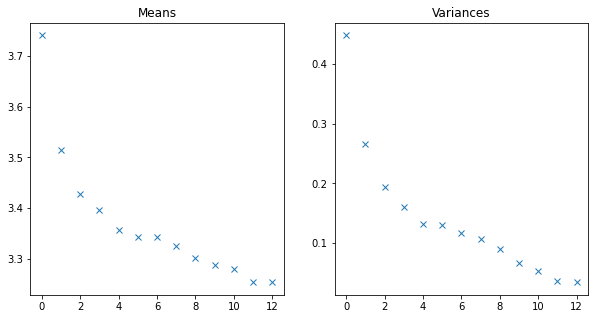

In [101]:
counts = C_paths_B.shape[1]
vals = []
vars = []
for i in range(counts):
    queue_size = max(Q_paths_B[:,i])
    print(queue_size)
    
    vals = vals + [np.mean(C_paths_B[C_paths_B[:,i] > 0,i])/queue_size]
    
    vars = vars + [np.var(C_paths_B[C_paths_B[:,i] > 0,i])/(queue_size**2)]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(vals,'x')
plt.title('Means')
plt.subplot(1,2,2)
plt.plot(vars,'x')
plt.title('Variances')

In [97]:
average_queue_B*2

array([ 5.     ,  9.     , 12.99968, 15.9995 , 18.9992 , 21.     ,
       21.99962, 24.99872, 30.998  , 41.     , 51.     , 75.9875 ,
       90.992  ])

In [98]:
np.average(Q_paths_B,axis = 0)

array([ 2.5    ,  4.5    ,  6.49984,  7.99975,  9.4996 , 10.5    ,
       10.99981, 12.49936, 15.499  , 20.5    , 25.5    , 37.99375,
       45.496  ])

In [100]:
Q_paths_B = np.asarray(Q_paths_B)
Q_paths_B.shape

(100000, 13)

1.0
2.0
3.0
4.0
5.0
8.0
10.0
12.0
15.0
18.0
20.0
30.0
40.0
50.0
60.0
100.0
135.0


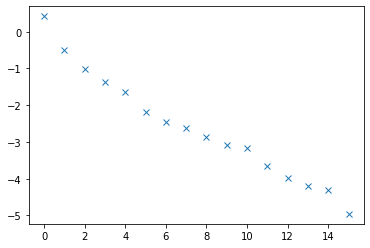

In [110]:
counts = C_paths_B_og.shape[1]
vals_og = []
vars_og = []
for i in range(counts):
    queue_size = max(Q_paths_B_og[:][i])
    print(queue_size)
    if queue_size > 100:
        break
        
    vals_og = vals_og + [np.mean(C_paths_B_og[C_paths_B_og[:,i] > 0,i])/queue_size]
    
    vars_og = vars_og + [np.var(C_paths_B_og[C_paths_B_og[:,i] > 0,i])/(queue_size**2)]
# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.plot(vals_og,'x')
# plt.title('Means')
# plt.subplot(1,2,2)
# plt.plot(vars_og,'x')
# plt.title('Variances')
plt.plot(np.log(vars_og),'x')

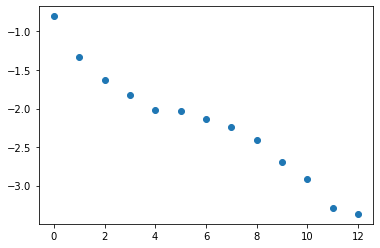

In [107]:
plt.plot(np.log(vars),'o')

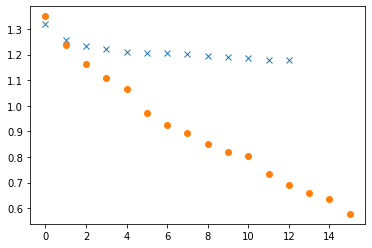

In [112]:
plt.plot(np.log(vals),'x')
plt.plot(np.log(vals_og),'o')

In [113]:
vals_og

[3.8552543385903726,
 3.4506327023420864,
 3.202307524706063,
 3.026906141568854,
 2.9029078243367237,
 2.6453190133666187,
 2.525865859303159,
 2.4463556177766304,
 2.3410935396679986,
 2.269375231235819,
 2.2333818140651323,
 2.0844576874910405,
 1.9962485047431398,
 1.9363727336899803,
 1.88626051284473,
 1.7824935149534915]

In [114]:
W

array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 5.09901951,
        2.23606798, 2.82842712, 3.60555128, 4.47213595, 5.38516481,
        3.16227766, 3.60555128, 4.24264069, 5.        , 5.83095189,
        4.12310563, 4.47213595, 5.        , 5.65685425, 6.40312424,
        5.09901951, 5.38516481, 5.83095189, 6.40312424, 7.07106781],
       [2.23606798, 1.41421356, 2.23606798, 3.16227766, 4.12310563,
        2.82842712, 2.23606798, 2.82842712, 3.60555128, 4.47213595,
        3.60555128, 3.16227766, 3.60555128, 4.24264069, 5.        ,
        4.47213595, 4.12310563, 4.47213595, 5.        , 5.65685425,
        5.38516481, 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [3.16227766, 2.23606798, 1.41421356, 2.23606798, 3.16227766,
        3.60555128, 2.82842712, 2.23606798, 2.82842712, 3.60555128,
        4.24264069, 3.60555128, 3.16227766, 3.60555128, 4.24264069,
        5.        , 4.47213595, 4.12310563, 4.47213595, 5.        ,
        5.83095189, 5.38516481, 5.09901951, 5.

In [125]:
file_name = "../longest_spatial_uniform_25_all_good.pkl"
with open(file_name,'rb') as f:
        M_res,B_res, N, W_og, pmf_cust_og, pmf_serv_og = pickle.load(f)

In [116]:
W_og

array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 5.09901951,
        2.23606798, 2.82842712, 3.60555128, 4.47213595, 5.38516481,
        3.16227766, 3.60555128, 4.24264069, 5.        , 5.83095189,
        4.12310563, 4.47213595, 5.        , 5.65685425, 6.40312424,
        5.09901951, 5.38516481, 5.83095189, 6.40312424, 7.07106781],
       [2.23606798, 1.41421356, 2.23606798, 3.16227766, 4.12310563,
        2.82842712, 2.23606798, 2.82842712, 3.60555128, 4.47213595,
        3.60555128, 3.16227766, 3.60555128, 4.24264069, 5.        ,
        4.47213595, 4.12310563, 4.47213595, 5.        , 5.65685425,
        5.38516481, 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [3.16227766, 2.23606798, 1.41421356, 2.23606798, 3.16227766,
        3.60555128, 2.82842712, 2.23606798, 2.82842712, 3.60555128,
        4.24264069, 3.60555128, 3.16227766, 3.60555128, 4.24264069,
        5.        , 4.47213595, 4.12310563, 4.47213595, 5.        ,
        5.83095189, 5.38516481, 5.09901951, 5.

In [120]:
W

array([[1.41421356, 2.23606798, 3.16227766, 4.12310563, 5.09901951,
        2.23606798, 2.82842712, 3.60555128, 4.47213595, 5.38516481,
        3.16227766, 3.60555128, 4.24264069, 5.        , 5.83095189,
        4.12310563, 4.47213595, 5.        , 5.65685425, 6.40312424,
        5.09901951, 5.38516481, 5.83095189, 6.40312424, 7.07106781],
       [2.23606798, 1.41421356, 2.23606798, 3.16227766, 4.12310563,
        2.82842712, 2.23606798, 2.82842712, 3.60555128, 4.47213595,
        3.60555128, 3.16227766, 3.60555128, 4.24264069, 5.        ,
        4.47213595, 4.12310563, 4.47213595, 5.        , 5.65685425,
        5.38516481, 5.09901951, 5.38516481, 5.83095189, 6.40312424],
       [3.16227766, 2.23606798, 1.41421356, 2.23606798, 3.16227766,
        3.60555128, 2.82842712, 2.23606798, 2.82842712, 3.60555128,
        4.24264069, 3.60555128, 3.16227766, 3.60555128, 4.24264069,
        5.        , 4.47213595, 4.12310563, 4.47213595, 5.        ,
        5.83095189, 5.38516481, 5.09901951, 5.

In [128]:
f

4.310811791889462 1.6038161458646023 0.08630509937220913


In [127]:
cost_pmf = np.outer(pmf_cust_og,pmf_serv_og).ravel()
weights = W.ravel()

mean_cost = sum(cost_pmf*weights)
variance_cost = sum(cost_pmf*(weights**2)) - mean_cost**2
print(mean_cost,variance_cost, variance_cost/(mean_cost**2))

3.856796996469445 1.5251169280242287 0.1025296750666597


In [6]:
file_name = '../lspu_rg_mwm.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, d, d, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
#average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M = np.average(Q_paths_M,axis = 0)
#print("average cost B", average_cost_B)
print("average cost M", average_cost_M)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]
average cost M [4.3129367  3.74755445 3.66059751 3.51857837 3.41587701 3.36446695
 3.44221268 3.33634893 3.32142489 3.2840127  3.27839178 3.26805496
 3.26115498 3.25691954]


In [18]:
file_name = '../lspu_25_largeq_reverse_geometric_mw-new-jan.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, d,d,d, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M_cons = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M_cons = np.average(Q_paths_M,axis = 0)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]


[-1.02433084  2.55877145] [0.12844861]
[-1.24669367  0.8565793 ] [1.92073801]
[-1.20359452  0.42830585] [0.50858386]
[-0.84588093  0.46085391] [0.07626542]


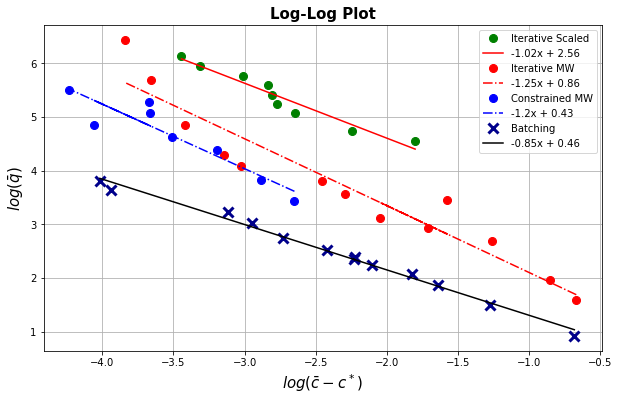

In [24]:
# Polynomial fit
deg = 1
xM = np.log(average_cost_M[1:]-Cstar)
yM = np.log(average_queue_M[1:])
xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B-Cstar)
yB2 = np.log(average_queue_B)
xM_c = np.log(average_cost_M_cons[1:9]-Cstar)
yM_c = np.log(average_queue_M_cons[1:9])


p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')

p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.plot(xM, yM,'ro',markersize = 8)
predict_M = np.poly1d(p)
x  = np.array(xM)
y = predict_M(x)
plt.plot(x, y,'r-.')

p, res, _, _, _ = np.polyfit(xM_c, yM_c, 1, full=True)
print(p,res)
plt.plot(xM_c, yM_c,'bo',markersize = 8)
predict_c = np.poly1d(p)
x  = np.array(xM_c)
y = predict_c(x)
plt.plot(x, y,'b-.')

plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)

plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Iterative Scaled",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Iterative MW", str(round(predict_M[1],2))+"x + " + str(round(predict_M[0],2)),
             "Constrained MW", str(round(predict_c[1],2))+"x + " + str(round(predict_c[0],2)), "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

Original was 1.51

In [30]:
file_name = '../lspu_25_largeq_reverse_geometric_maxweight_new.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, d,d,d, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
average_cost_B = average_new
Q_paths_M = np.transpose( np.asarray( Q_paths_M )  )
C_paths_M = np.transpose( np.asarray( C_paths_M ) )
average_cost_M_OLD = np.sum(C_paths_M,axis=0)/(Q_paths_M.shape[0] - Q_paths_M[-1,:])
average_queue_M_OLD = np.average(Q_paths_M,axis = 0)

PMFs
[0.10773422 0.0969608  0.08726472 0.07853824 0.07068442 0.06361598
 0.05725438 0.05152894 0.04637605 0.04173844 0.0375646  0.03380814
 0.03042733 0.02738459 0.02464613 0.02218152 0.01996337 0.01796703
 0.01617033 0.0145533  0.01309797 0.01178817 0.01060935 0.00954842
 0.00859358] [0.00859358 0.00954842 0.01060935 0.01178817 0.01309797 0.0145533
 0.01617033 0.01796703 0.01996337 0.02218152 0.02464613 0.02738459
 0.03042733 0.03380814 0.0375646  0.04173844 0.04637605 0.05152894
 0.05725438 0.06361598 0.07068442 0.07853824 0.08726472 0.0969608
 0.10773422]


[-1.02433084  2.55877145] [0.12844861]
[-2.85208161 -4.67092336] [0.10646328]
[-1.20359452  0.42830585] [0.50858386]
[-1.51240752  0.10215233] [0.29445767]
[-0.84588093  0.46085391] [0.07626542]


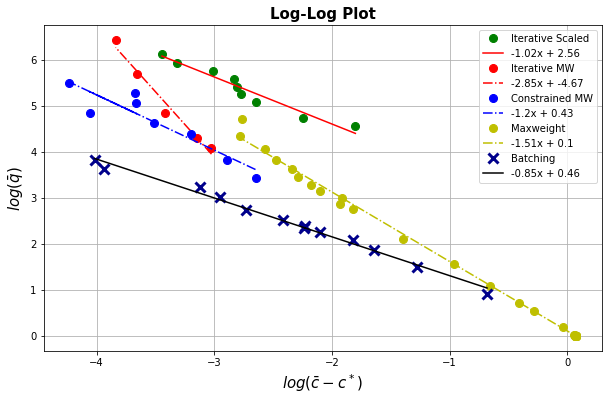

In [ ]:
# Polynomial fit
deg = 1
xM = np.log(average_cost_M[:]-Cstar)
yM = np.log(average_queue_M[9:])
xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
yM2 = np.log(average_queue_M_sc[1:10])
xB2 = np.log(average_cost_B-Cstar)
yB2 = np.log(average_queue_B)
xM_c = np.log(average_cost_M_cons[1:9]-Cstar)
yM_c = np.log(average_queue_M_cons[1:9])
xM_OLD = np.log(average_cost_M_OLD-Cstar)
yM_OLD = np.log(average_queue_M_OLD)

p, res, _, _, _ = np.polyfit(xM2, yM2, 1, full=True)
print(p,res)
plt.figure( figsize=(10,6) )
plt.plot(xM2, yM2,'go',markersize = 8)
predict_2 = np.poly1d(p)
x  = np.array(xM2)
y = predict_2(x)
plt.plot(x, y,'r')

p, res, _, _, _ = np.polyfit(xM, yM, 1, full=True)
print(p,res)
plt.plot(xM, yM,'ro',markersize = 8)
predict_M = np.poly1d(p)
x  = np.array(xM)
y = predict_M(x)
plt.plot(x, y,'r-.')

p, res, _, _, _ = np.polyfit(xM_c, yM_c, 1, full=True)
print(p,res)
plt.plot(xM_c, yM_c,'bo',markersize = 8)
predict_c = np.poly1d(p)
x  = np.array(xM_c)
y = predict_c(x)
plt.plot(x, y,'b-.')

p, res, _, _, _ = np.polyfit(xM_OLD, yM_OLD, 1, full=True)
print(p,res)
plt.plot(xM_OLD, yM_OLD,'yo',markersize = 8)
predict_OLD = np.poly1d(p)
x  = np.array(xM_OLD)
y = predict_OLD(x)
plt.plot(x, y,'y-.')

plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)

plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Iterative Scaled",str(round(predict_2[1],2))+"x + " + str(round(predict_2[0],2)), "Iterative MW", str(round(predict_M[1],2))+"x + " + str(round(predict_M[0],2)),
             "Constrained MW", str(round(predict_c[1],2))+"x + " + str(round(predict_c[0],2)), "Maxweight", str(round(predict_OLD[1],2))+"x + " + str(round(predict_OLD[0],2)),
             "Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])